[1.50009087e-09 5.23862951e+08]
chisq =  10.063205637121342 ,     ndof =  3

 Fitted parameters and standard deviations and variance:
thetaHat[ 0 ] =  0.0009899966696088147   +-   3.8731006591282505e-05   +-   1.5000908715739689e-09
thetaHat[ 1 ] =  -589395.6446954239   +-   22888.052572658446   +-   523862950.56877697

 i, j, cov[i,j], rho[i,j]:
0    0    1.5000908715739689e-09    1.0
0    1    -0.8848121252911342    -0.998121565285604
1    0    -0.8848121252911342    -0.998121565285604
1    1    523862950.56877697    1.0000000000000002


<Figure size 432x288 with 0 Axes>

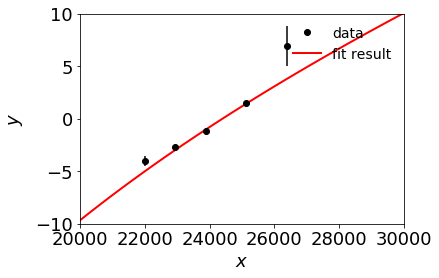

<Figure size 432x288 with 0 Axes>

In [24]:
#  simpleFit.py
#  G. Cowan / RHUL Physics / October 2017
#  Simple program to illustrate least-squares fitting with curve_fit

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# set data values
y   = np.array([-4.02,-2.74,-1.15,1.49, 6.87]) #y in table
x   = np.array([22000, 22930, 23880, 25130, 26390]) #x in table
sigma = np.array([0.5,0.25,0.08,0.09,1.90])
x0 = np.array(numPar*[1.0])


# define fit function (order of polynomial set using numPar below).
def func(x,a,b):
    return a*x + b/x
# set default parameter values and do the fit
numPar = 2                     # set number of parameters here

thetaHat, cov = curve_fit(func, x, y, x0, sigma, absolute_sigma=True)

print(np.diag(cov))
# Retrieve minimized chi-squared, etc.
numPoints = len(x)
ndof = numPoints - numPar
chisq = sum(((y - func(x, *thetaHat))/sig)**2)
print("chisq = ", chisq, ",     ndof = ", ndof)

# Print fit parameters and covariance matrix
print( "\n", "Fitted parameters and standard deviations and variance:")
sigThetaHat = np.sqrt(np.diag(cov))
varThetaHat = np.diag(cov)
for i in range(len(thetaHat)):
    print("thetaHat[", i, "] = ", thetaHat[i], "  +-  ", sigThetaHat[i], "  +-  ", varThetaHat[i])

print( "\n", "i, j, cov[i,j], rho[i,j]:")
for i in range(len(thetaHat)):
    for j in range(len(thetaHat)):
        rho = cov[i][j] / (sigThetaHat[i]*sigThetaHat[j])
        print( i, "  ", j, "  ", cov[i][j], "  ", rho)

        
# Set up plot
matplotlib.rcParams.update({'font.size':18})     # set all font sizes
plt.clf()
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sig, xerr=0, color='black', fmt='o', label='data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', labelpad=10)
xMin = 20000
xMax = 30000
yMin = -10
yMax = 10
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)        # enough points for a smooth curve
fit = func(xPlot, *thetaHat)
plt.plot(xPlot, fit, 'red', linewidth=2, label='fit result')

# Tweak legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='upper right', fontsize=14, frameon=False)

# Make and store plot
plt.show()
plt.savefig("q2.pdf", format='pdf')